# Forecasting 4 different product in next 14 days

# Name : Muhammad Julizar   

# 4. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error


pd.set_option('display.max_rows', None)

# 5. Data Loading
## Kalbe Dataset

In [2]:
sheet = ['A1','A2','B1','B2']
df= {}

for i in sheet:
    df[i] = pd.read_excel('D:\Hacktiv 8\Work\Kalbe and Aria\kalbe_data.xlsx', sheet_name=i )

In [3]:
df['A1'].head()

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


In [4]:
df['A1'].tail()

,Day,Category,Product,Sales
85,86,A,A1,196.980000
86,87,A,A1,197.964900
87,88,A,A1,198.954724
88,89,A,A1,199.949498
89,90,A,A1,200.949246


In [5]:
df['A1'].describe()

,Day,Sales
count,90.000000,90.000000
mean,45.500000,150.819298
std,26.124701,31.200698
min,1.000000,100.000000
25%,23.250000,122.718030
50%,45.500000,149.696822
75%,67.750000,178.000000
max,90.000000,210.000000


In [6]:
df['B1'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     90 non-null     float64
 4   Event     104 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [7]:
df['B1'].drop(index=df['B1'].iloc[-14:].index, inplace=True)


In [8]:
df['B1'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
 4   Event     90 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ KB


# 6. Exploratory Data Analysis

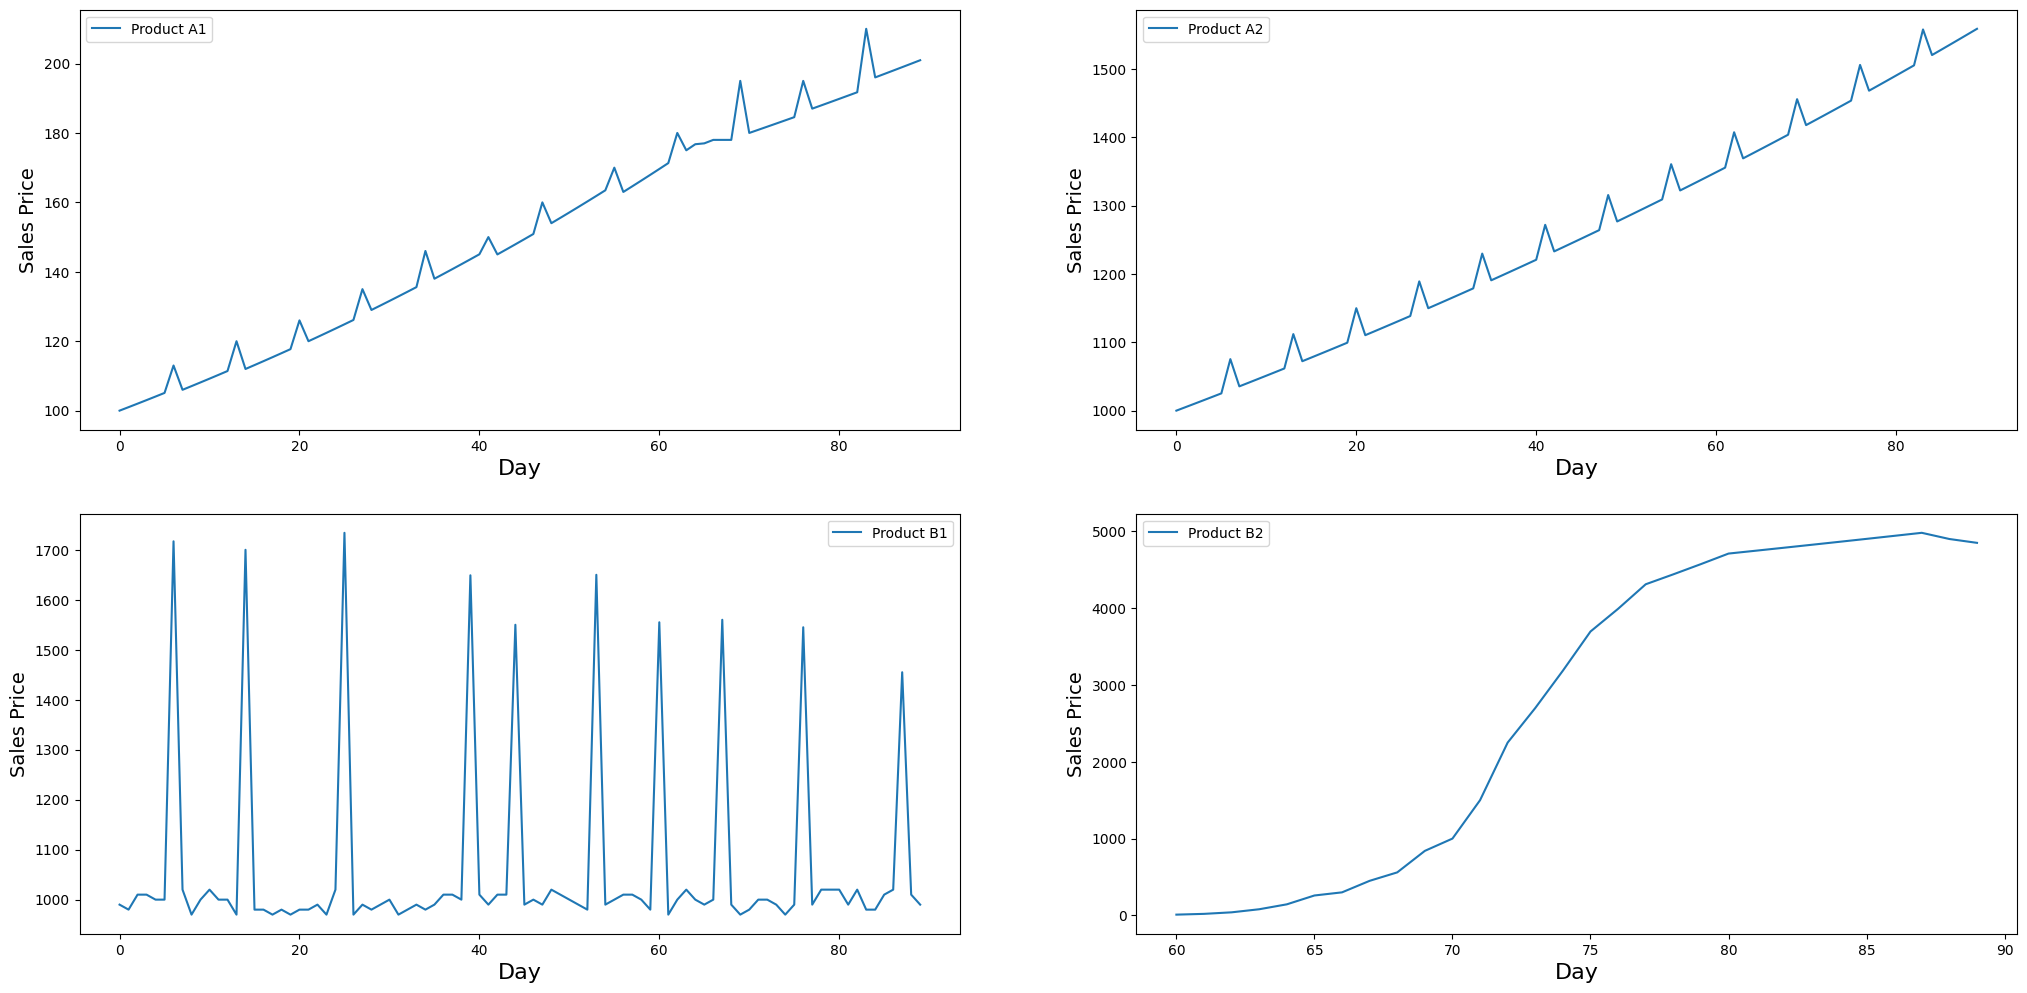

In [9]:
plt.figure(figsize=(25,12))
plt.subplot(221)
plt.plot(df['A1']['Sales'], label='Product A1')
plt.ylabel('Sales Price', fontsize=14)
plt.xlabel('Day', fontsize=16)
plt.legend(loc='best')

plt.subplot(222)
plt.plot(df['A2']['Sales'], label='Product A2')
plt.ylabel('Sales Price', fontsize=14)
plt.xlabel('Day', fontsize=16)
plt.legend(loc='best')

plt.subplot(223)
plt.plot(df['B1']['Sales'],label='Product B1')
plt.ylabel('Sales Price', fontsize=14)
plt.xlabel('Day', fontsize=16)
plt.legend(loc='best')

plt.subplot(224)
plt.plot(df['B2']['Sales'], label='Product B2')
plt.ylabel('Sales Price', fontsize=14)
plt.xlabel('Day', fontsize=16)
plt.legend(loc='best')

plt.show()

In [10]:
for i in sheet:
    print(df[i].isna().sum())

Day         0
Category    0
Product     0
Sales       0
dtype: int64
Day         0
Category    0
Product     0
Sales       0
dtype: int64
Day         0
Category    0
Product     0
Sales       0
Event       0
dtype: int64
Day          0
Category     0
Product      0
Sales       74
dtype: int64


Terlihat banyak sekali missing value pada product B2 yang melebihi 10% sehingga hal tersebut perlu di handle.

Dan jika dilihat pada Produc `B1` memiliki kolom yang tidak seragam sehingga perlu di hapus.

In [11]:
for i in sheet:
    print(df[i].skew(numeric_only=True))

Day      0.000000
Sales    0.018566
dtype: float64
Day      0.000000
Sales    0.142393
dtype: float64
Day      0.000000
Sales    2.592447
Event    2.517020
dtype: float64
Day      0.000000
Sales   -0.249127
dtype: float64


Dari hasil nilai skewness dapat kita lihat 3 dari 4 dataset memiliki distribusi nilai yang normal kecuali pada `product B1`.

# 7. Data Preprocessing

Jika dilihat dari skewnessnya, menurut saya metode yang tepat untuk mengisi missing value pada product B2 adalah dengan menggunakan MEAN

In [12]:
# Handling Missing values
df['B2'][['Sales']] = df['B2'][['Sales']].fillna(df['B2']['Sales'].mean())
df['B2'].head()

,Day,Category,Product,Sales
0,1,B,B2,2761.875726
1,2,B,B2,2761.875726
2,3,B,B2,2761.875726
3,4,B,B2,2761.875726
4,5,B,B2,2761.875726


In [13]:
# Memeriksa setelah missing value di handle
df['B1'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
 4   Event     90 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ KB


In [14]:
# Menghapus kolom Event
df['B1'] = df['B1'].drop(columns=['Event'])


In [15]:
df['B1'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [16]:
df['B2'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     104 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ KB


In [17]:
df['B2'].drop(index=df['B2'].iloc[-14:].index, inplace=True)



Disini saya membuat asumsi bahwa data diambil dari penjualan yg dimulai pada bulan november

In [18]:
# Import date times
start = datetime.strptime('2022-11-01', '%Y-%m-%d')
all_dates = [start + timedelta(x) for x in df['A1'].index]


all_dates= pd.DataFrame(all_dates, columns=['Dates'])
all_dates.head()

,Dates
0,2022-11-01
1,2022-11-02
2,2022-11-03
3,2022-11-04
4,2022-11-05


In [19]:
for i in sheet:
    df[i] = pd.concat([all_dates, df[i]], axis=1)

In [20]:
df['A1'].head()

,Dates,Day,Category,Product,Sales
0,2022-11-01,1,A,A1,100.000000
1,2022-11-02,2,A,A1,101.000000
2,2022-11-03,3,A,A1,102.010000
3,2022-11-04,4,A,A1,103.030100
4,2022-11-05,5,A,A1,104.060401


Menghapus kolom day, category, product. agar dataset timeseries bisa di olah lebih lanjut

In [21]:
data = {}

for i in sheet: 
    data[i] = df[i].drop(columns=['Day', 'Category', 'Product'])

In [22]:
# membuat dates menjadi index
for i in sheet:
  data[i] = data[i].set_index('Dates')

In [23]:
data['A1'].tail()

,Sales
Dates,
2023-01-25,196.980000
2023-01-26,197.964900
2023-01-27,198.954724
2023-01-28,199.949498
2023-01-29,200.949246


In [24]:
# Decompose data ke dalam komponen trend, seasonal, dan residu
for i in sheet:
    decomposition = seasonal_decompose(data[i], model='additive')
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

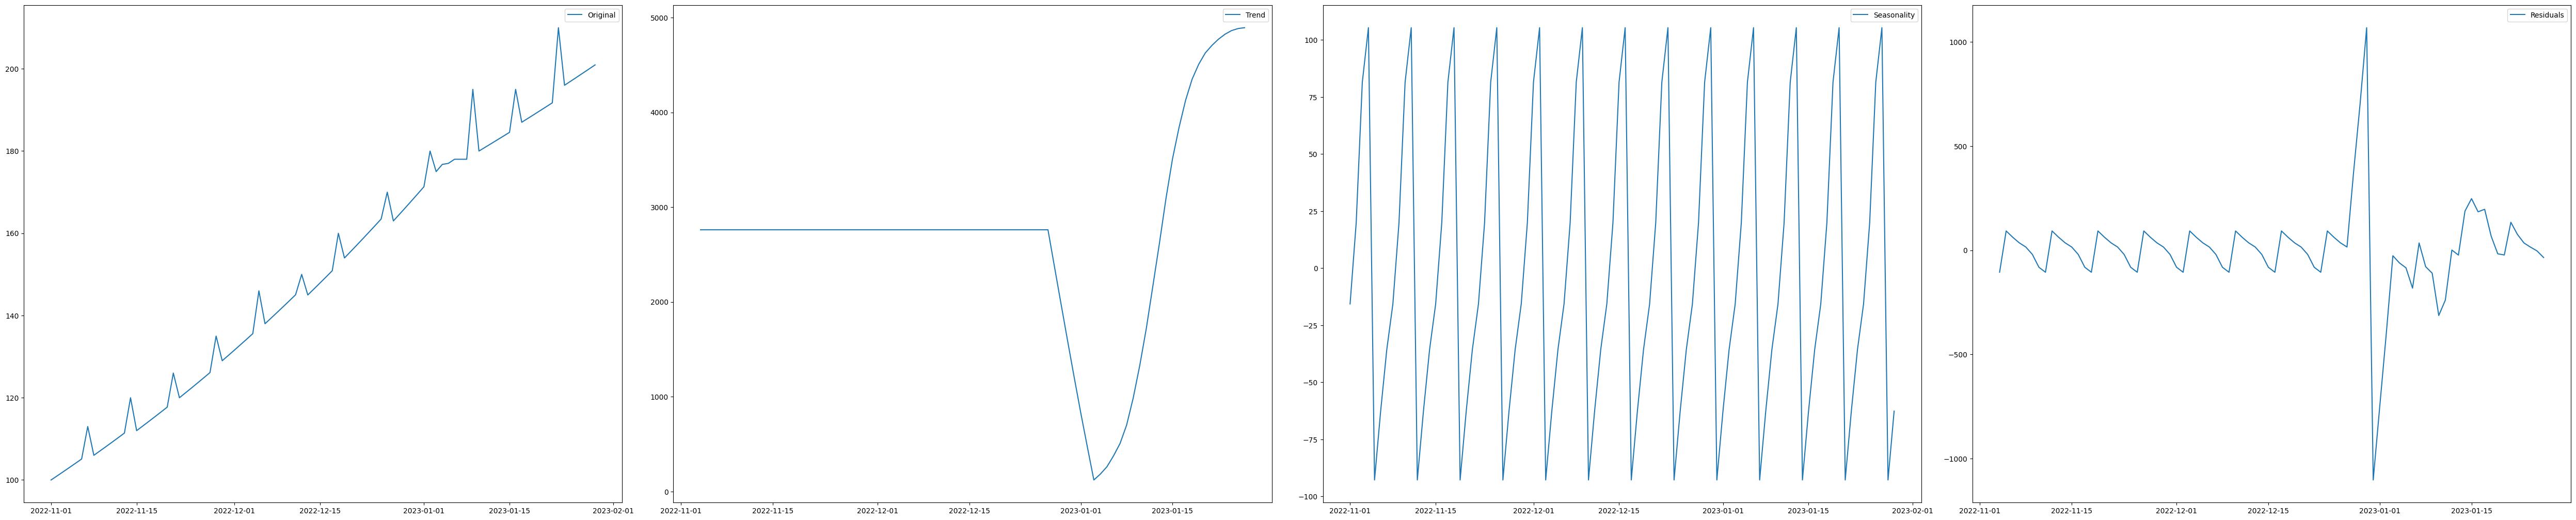

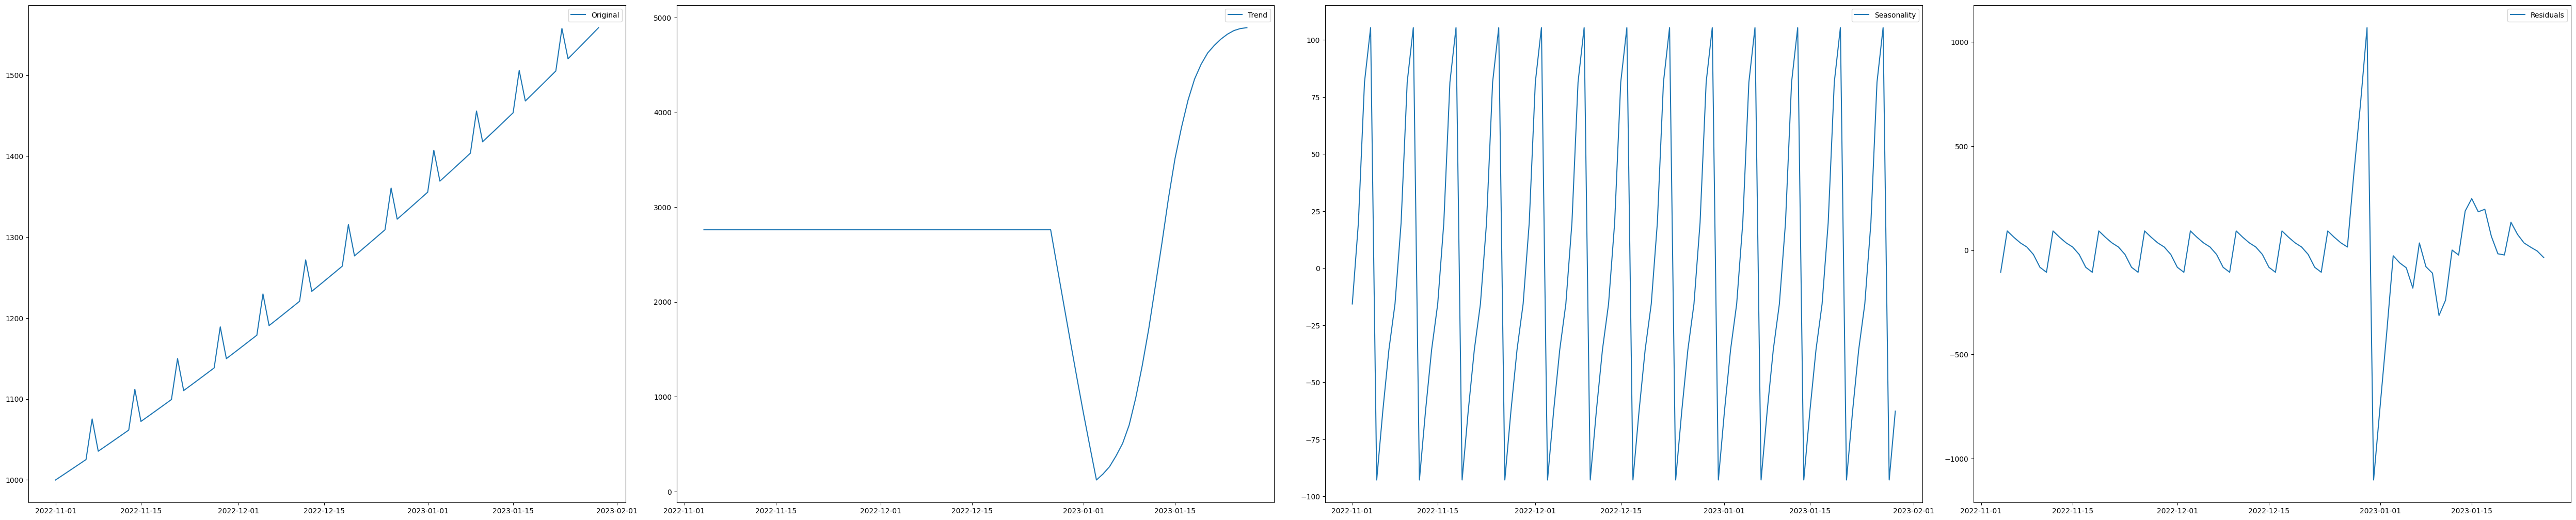

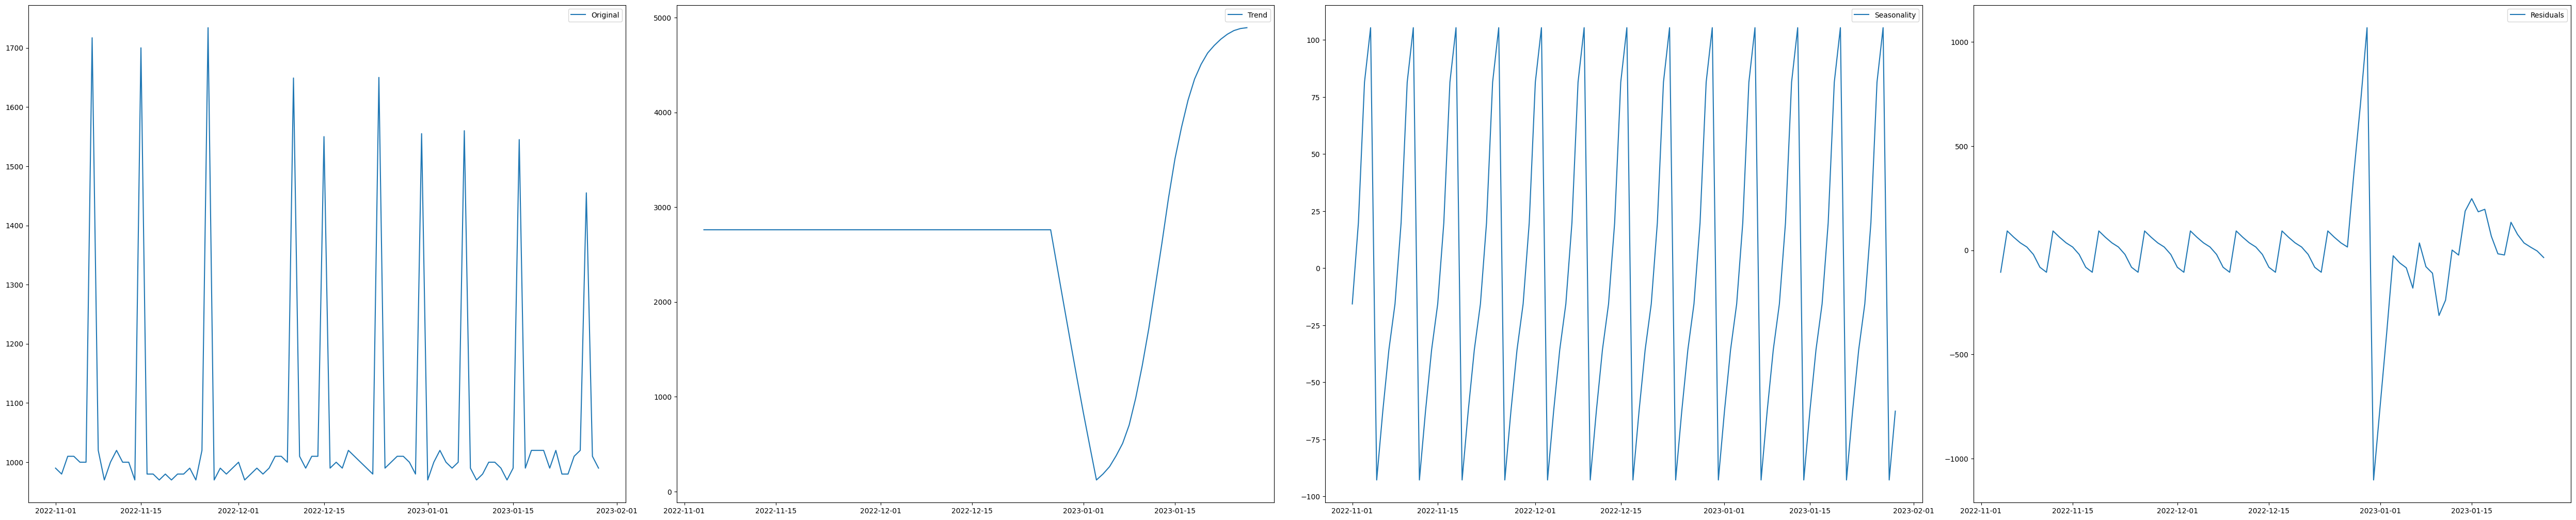

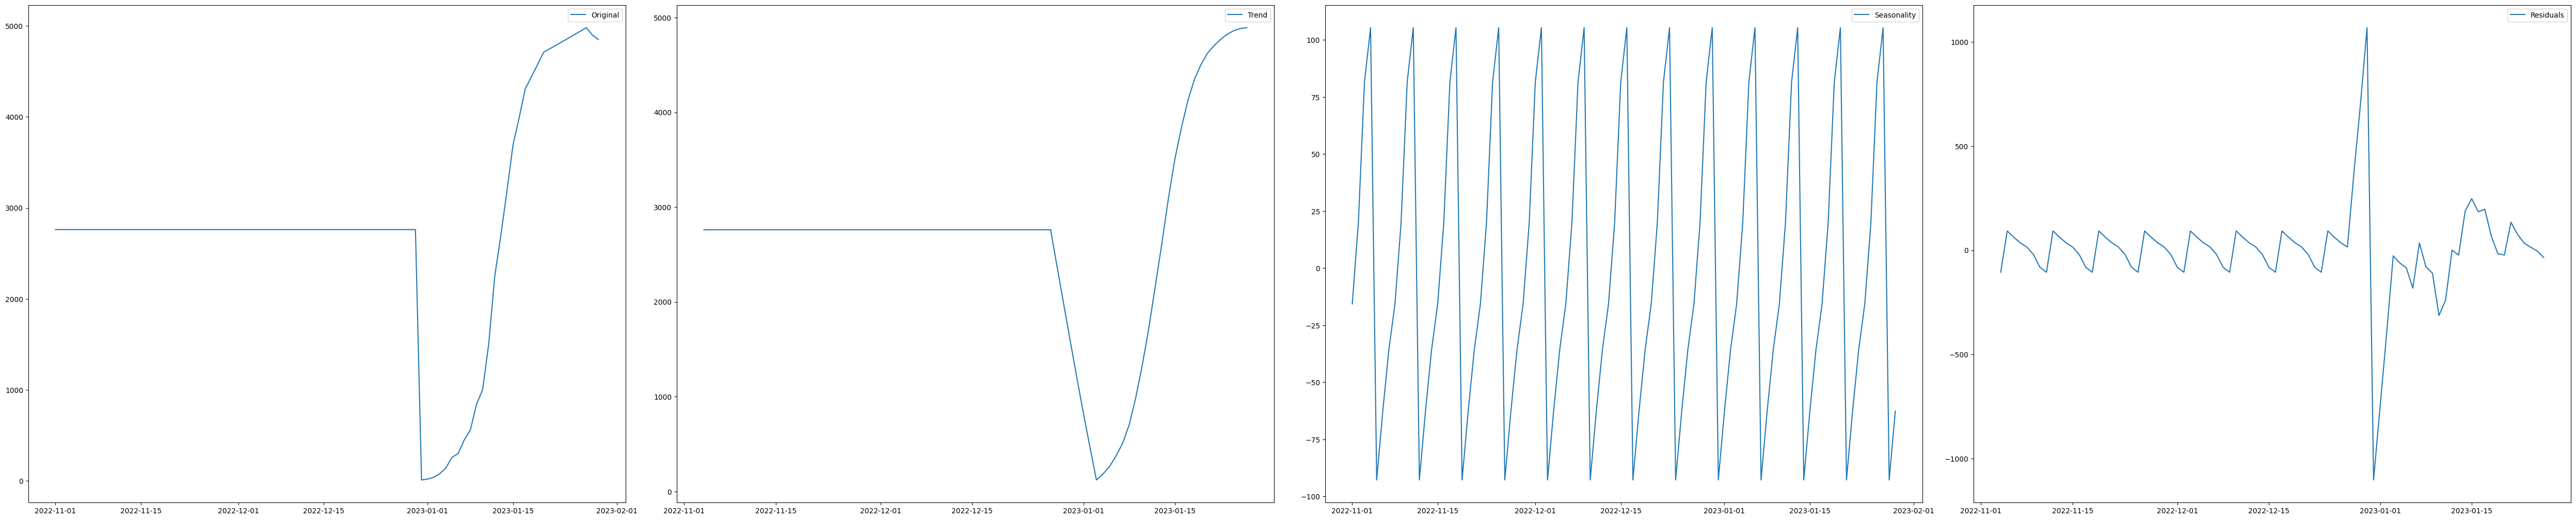

In [25]:
# Plot hasil decompose
for i in sheet:
    plt.figure(figsize=(50,40))
    plt.subplot(441)
    plt.plot(data[i], label='Original')
    plt.legend(loc='best')
    plt.subplot(442)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(443)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(444)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()

In [26]:
# Pengecekan stasioner menggunakan Augmented Dickey-Fuller (ADF) Test
for i in sheet:
    result = adfuller(data[i]['Sales'])
    print(f'Cek stasioner {i}')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

Cek stasioner A1
ADF Statistic: 0.160245
p-value: 0.969942
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586
Cek stasioner A2
ADF Statistic: 176251481456927.250000
p-value: 1.000000
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586
Cek stasioner B1
ADF Statistic: -6.194331
p-value: 0.000000
Critical Values:
	1%: -3.511
	5%: -2.897
	10%: -2.585
Cek stasioner B2
ADF Statistic: -1.416777
p-value: 0.574207
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585


Jika dilihat dari hasil pengecekan stasioner dengan metode ADF, 3 dari 4 dataset yang ada menunjukkan bahwa data tidak stasioner, hal ini dibuktikan nilai p-value yang lebih besar dari 0.05.

## Split Train - Test

In [27]:
data_new = {}
for i in sheet:
  data_new[i] = {}
  data_new[i]['train'] = data[i]['Sales'].iloc[:-14]
  data_new[i]['test'] = data[i]['Sales'].iloc[-14:]


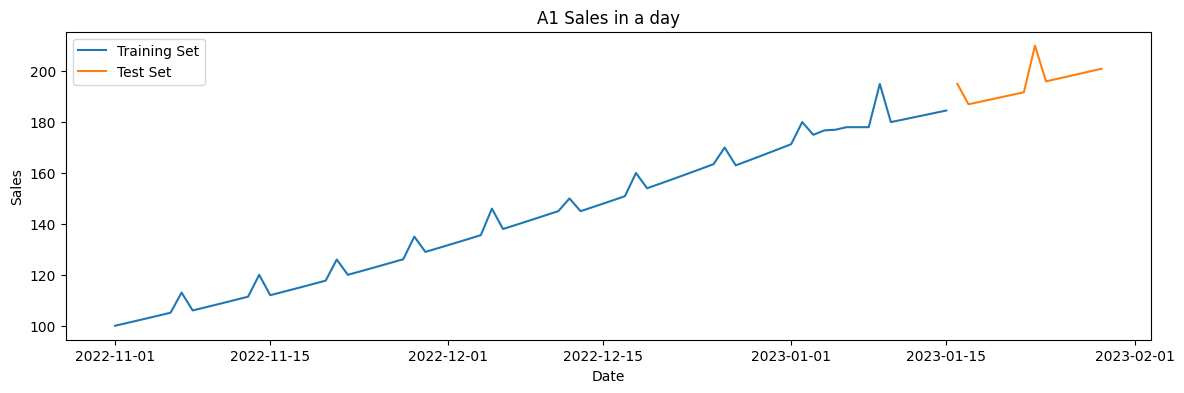

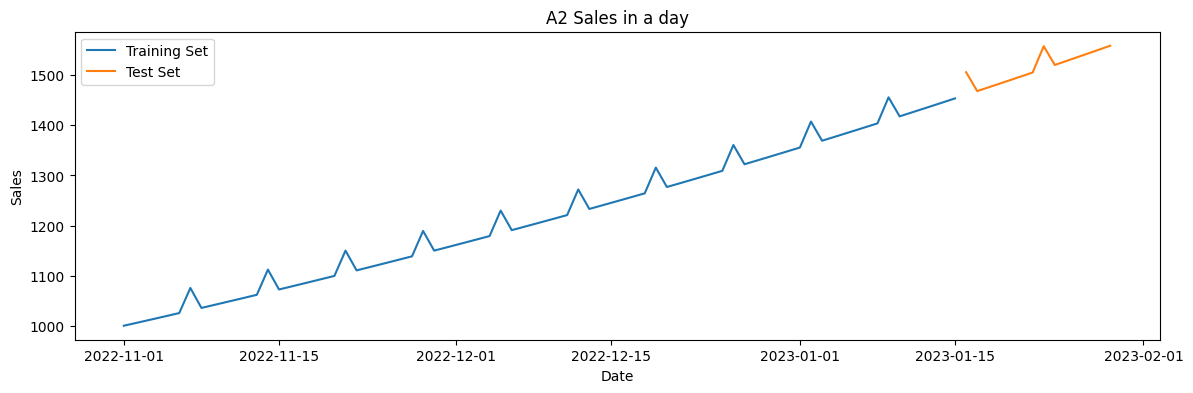

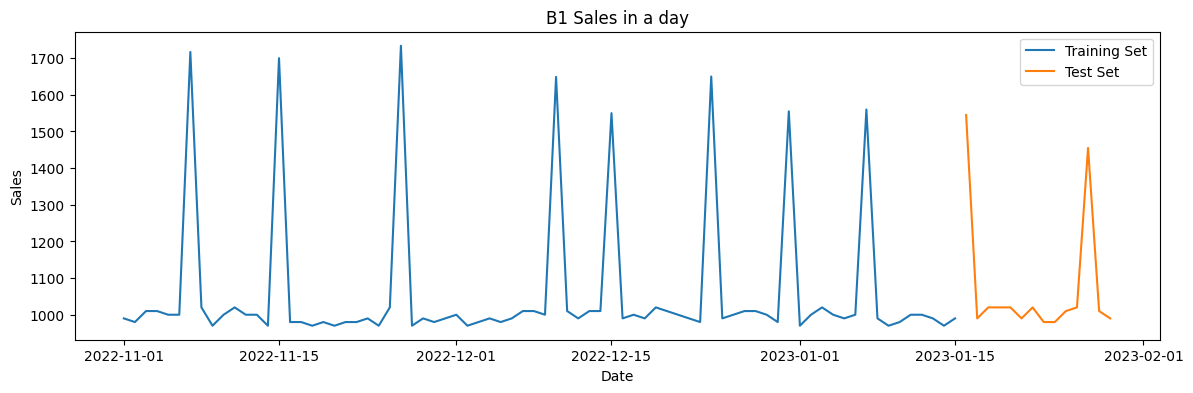

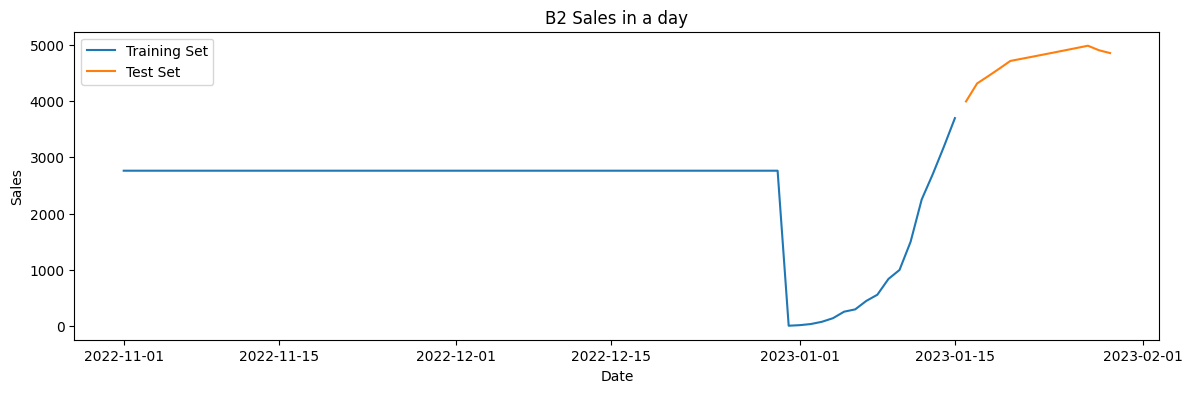

In [28]:
for i in sheet:
    plt.figure(figsize=(14,4))
    plt.plot(data_new[i]["train"])
    plt.plot(data_new[i]["test"])
    plt.ylabel("Sales")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Sales in a day")

# 8. Modelling

In [29]:
# Membuat model ARIMA dengan parameter yang telah ditentukan
predict = {}
for i in sheet:
    model = ARIMA(data_new[i]['train'], order=(2, 2, 2))
    model_fit = model.fit()

    # Melakukan forecasting
    predict[i] = model_fit.forecast(steps=14)

    

c:\Users\Muhammad Julizar\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Muhammad Julizar\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Muhammad Julizar\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Muhammad Julizar\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starti

In [30]:
for i in sheet:
    print(predict[i])

2023-01-16    187.100538
2023-01-17    186.448855
2023-01-18    189.213521
2023-01-19    189.108218
2023-01-20    191.034036
2023-01-21    191.760204
2023-01-22    193.018206
2023-01-23    194.197793
2023-01-24    195.202262
2023-01-25    196.481538
2023-01-26    197.486385
2023-01-27    198.712728
2023-01-28    199.787976
2023-01-29    200.948259
Freq: D, Name: predicted_mean, dtype: float64
2023-01-16    1468.944247
2023-01-17    1461.615429
2023-01-18    1480.317504
2023-01-19    1477.218695
2023-01-20    1488.074252
2023-01-21    1493.126475
2023-01-22    1497.616467
2023-01-23    1506.408115
2023-01-24    1509.661644
2023-01-25    1517.866980
2023-01-26    1522.674765
2023-01-27    1529.112366
2023-01-28    1535.390428
2023-01-29    1540.894346
Freq: D, Name: predicted_mean, dtype: float64
2023-01-16    1088.597332
2023-01-17    1076.053816
2023-01-18    1065.966108
2023-01-19    1067.366988
2023-01-20    1067.397712
2023-01-21    1066.348821
2023-01-22    1065.548900
2023-01-23  

# 9. Model Evaluation

In [31]:
for i in sheet:
    print(f'Nilai MAE {i} : {mean_absolute_error(data_new[i]["test"], predict[i])}')

Nilai MAE A1 : 2.2462406483495454
Nilai MAE A2 : 14.387081086917338
Nilai MAE B1 : 113.18312425707254
Nilai MAE B2 : 1760.4807332523876


Dari hasil evaluasi menggunakan metrik `mean_absoulute_erorr`, pada product A1,A2,B1 memiliki erorr yg sangat kecil sesuai dengan value pada dataset masing masing
misal pada data A1 hasil sales ratusan dengan absolut erorr yang hanya satuan, sehingga sangat kecil sekali erorr yang didapatkan pada model ini, sedangkan pada A2 dan seterusnya memiliki nilai sales ribuan.

Namun pengecualian pada data B2, alasan nilai erorr pada B2 besar adalah, hanya 30 value asli yang ada pada dataset B2, sedangkan value yang lain di isi dari rata-rata 30 data yang ada. hal inilah yang membuat nilai erorr menjadi besar.

# 10. Forecasting
### melakukan forecast untuk 14 hari kedepan setelah hari terakhir

In [32]:
# Membuat model ARIMA dengan parameter yang telah ditentukan
forecast = {}
for i in sheet:
    model = ARIMA(data[i], order=(2, 2, 2))
    model_fit = model.fit()

    # Melakukan forecasting
    forecast[i] = model_fit.forecast(steps=14)

c:\Users\Muhammad Julizar\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Muhammad Julizar\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Muhammad Julizar\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Muhammad Julizar\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starti

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_10124\3571495535.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


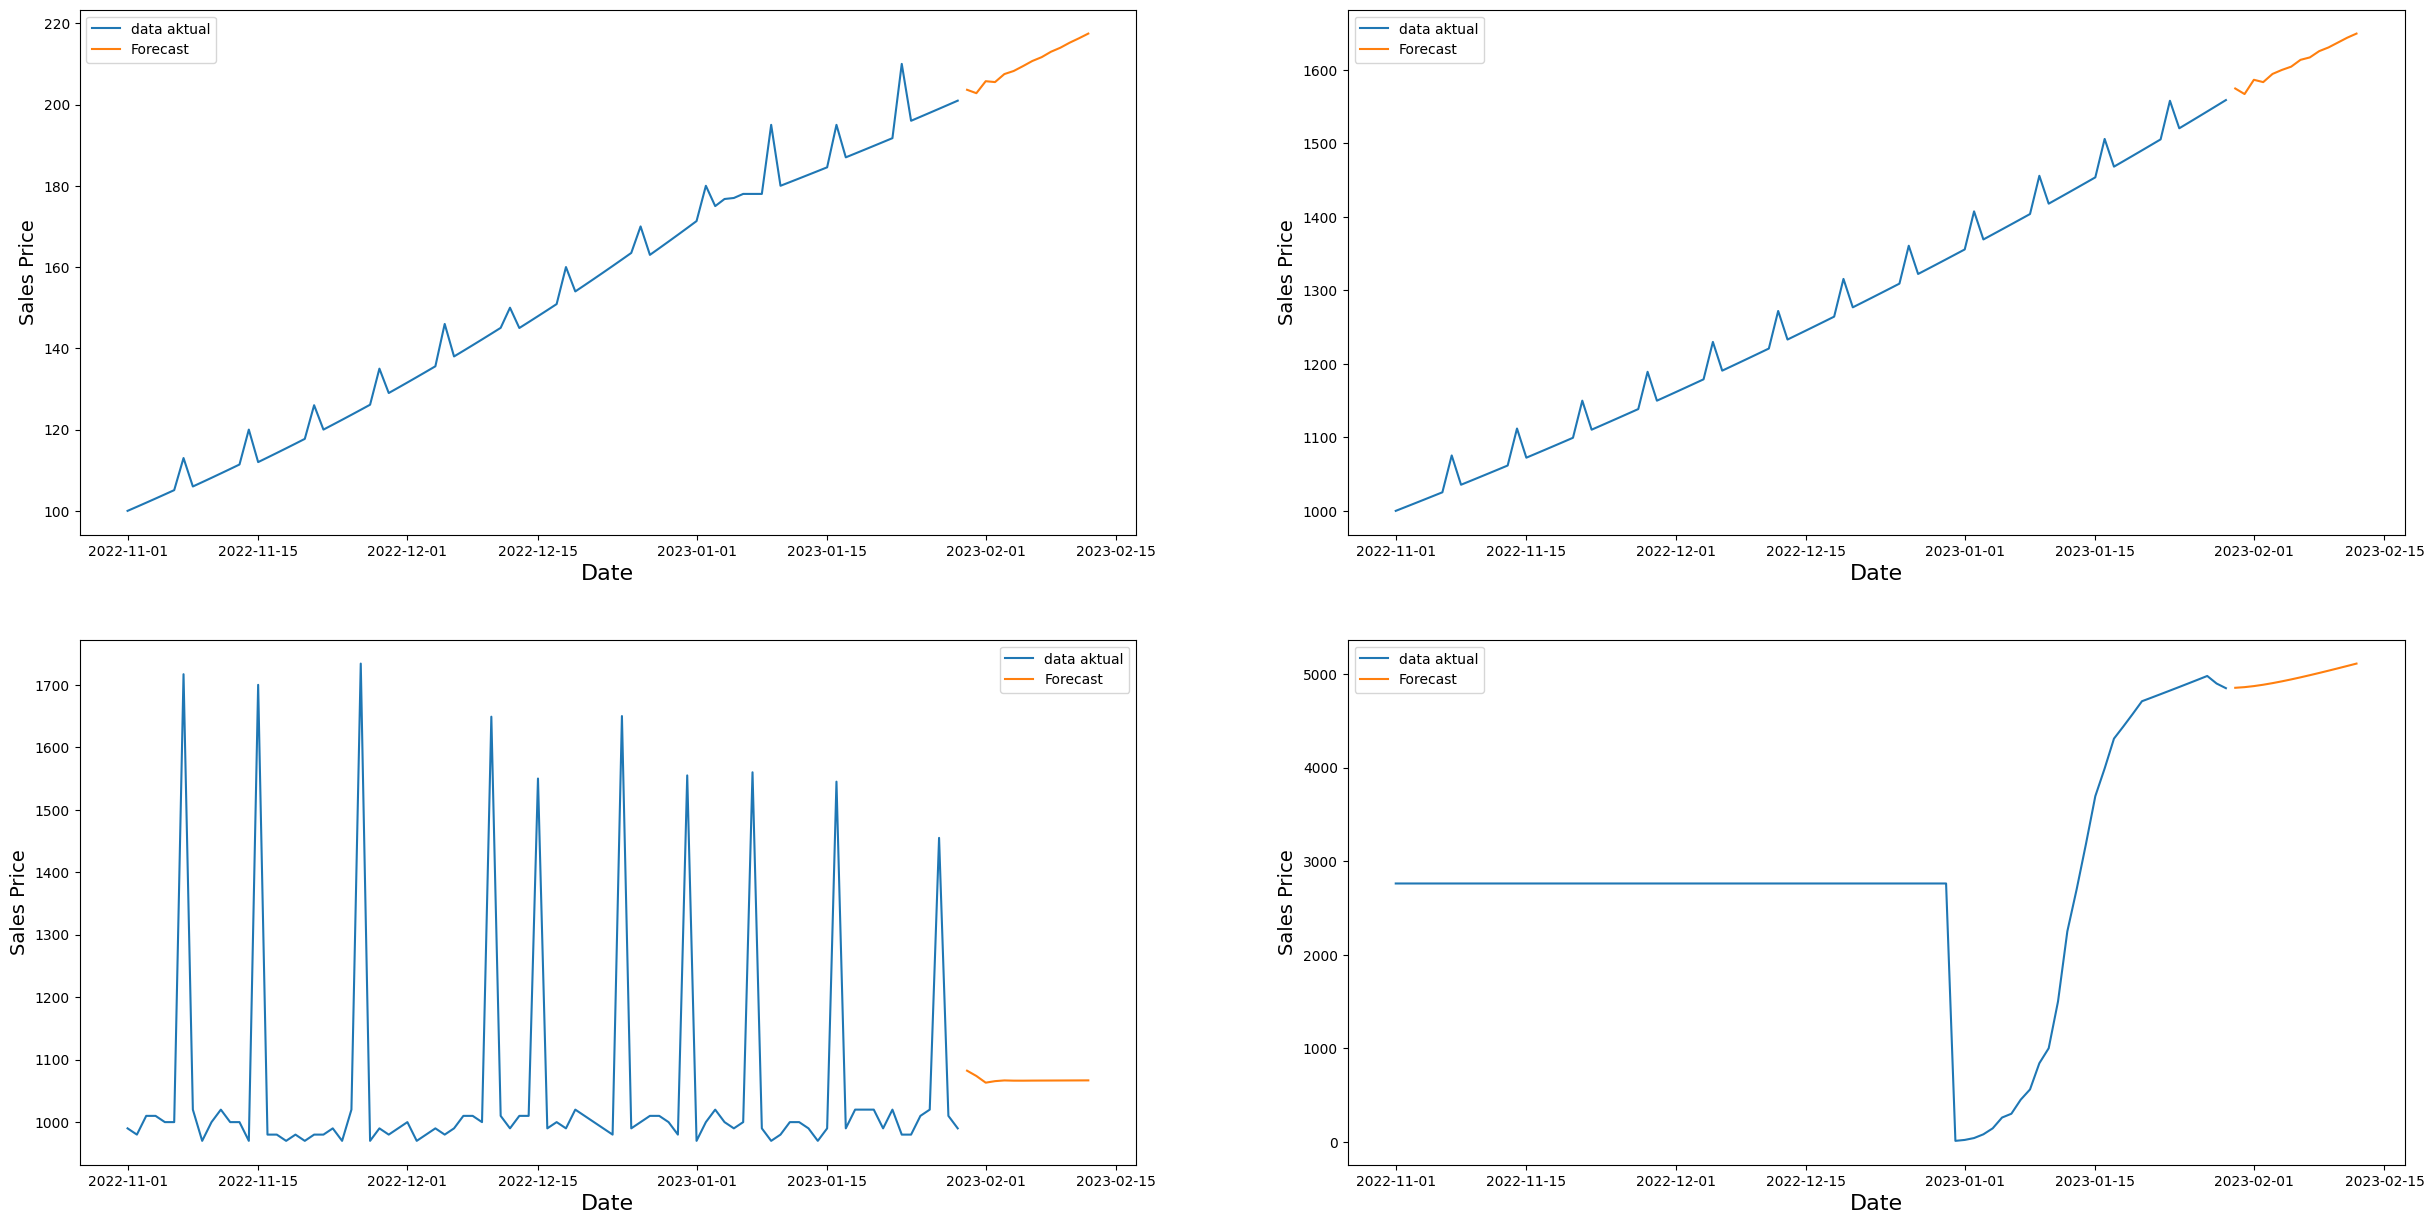

In [33]:
# Plot hasil forecasting
plt.subplots(figsize=(30,15))

plt.subplot(221)
plt.plot(data['A1'], label='data aktual')
plt.plot(forecast['A1'], label='Forecast')
plt.ylabel('Sales Price', fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.legend(loc='best')

plt.subplot(222)
plt.plot(data['A2'], label='data aktual')
plt.plot(forecast['A2'], label='Forecast')
plt.ylabel('Sales Price', fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.legend(loc='best')

plt.subplot(223)
plt.plot(data['B1'], label='data aktual')
plt.plot(forecast['B1'], label='Forecast')
plt.ylabel('Sales Price', fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.legend(loc='best')

plt.subplot(224)
plt.plot(data['B2'], label='data aktual')
plt.plot(forecast['B2'], label='Forecast')
plt.ylabel('Sales Price', fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.legend(loc='best')
plt.show()

Dari hasil forecasting diatas pada product A1, A2, dan B2 memiliki hasil forecasting yang akurat mengikuti trend pada data history sebelumnya, hal ini dikarenakan:
pemilihan nilai p, d dan q sangat tepat yaitu (2,2,2) hal ini tepat karena pada data A1, A2, B2 bertipe `tidak stasioner`dibuktikan dengan nilai`p-value` yang melebihi angka 0.05.

Sedangkan pada data B1 dari awal data tsb sudah stasioner, sehingga jika diperlakukan menggunakan p,d,q sebesar (2,2,2) kurang tepat, seharusnya tidak perlu. sehingga hasil forecasting agak sedikit meleset.

# 11.  Analisis dan Kesimpulan

### A. Analysis EDA
1. Pada masing masing product memiliki karakter data yang berbeda-beda, contohnya untuk product A1 dan A2 memiliki karakter data `tren yang meningkat` setiap waktu<br>
sedangkan pada product B1 karakter datanya `naik turun`
Untuk B2 memiliki karakter data yang `meningkat namun melandai di akhir`.

2. Terdapat `60 missing value` pada product `B2` jika dibuat menjadi 90 days

3. 3 dari 4 data memiliki `nilai skewness yang normal` pada kolom sales, `kecuali` pada product B1

4. Terdapat kolom yang tidak perlu dipakai pada category B, dan terdapat kelebihan row jika ingin diproses dengan rentang waktu 90 hari terakhir, hal ini terbuktu pada product B2

### B Analysis Keseluruhan

1. Dilakukan `feature engineering` yakni memilih beberapa feature yang dirasa perlu untuk time series, sehingga disisakan 1 kolom yakni `sales`. lalu dilakukan handling missing value dengan metode `.fillna(mean)` hal ini dipilih karena rata-rata Sales setiap data memiliki distribusi yang normal

2. `cek stasioner`, 3 dari 4 data memiliki karakteristik tidak stasioner `kecuali` product B1.

3. Dilakukan modelling dengan `ARIMA`, dikarenakan `waktu yang terbatas`, dan data rata-rata `tidak stasioner` maka dipilih parameter modeling dengan `2 lag variable dependen, 2 kali differencing dan 2 lag residual`

4. Dilakukan pengujian metrik `mean_absoulute_erorr (MAE)` pengujian ini dipilih karena ingin melihat tingkat erorr rata-rata sebenarnya pada dataset ini. Pada product A1,A2,B1 memiliki erorr yg `sangat kecil` sesuai dengan nilai sales pada dataset masing masing<br><br>
misal pada data A1 hasil sales ratusan dengan `MAE yang hanya satuan`, sehingga sangat kecil sekali erorr yang didapatkan pada model ini, sedangkan pada `A2 dan B1` memiliki nilai sales ribuan namun hasil `MAE masing hanya puluhan dan ratusan` .<br><br>
`Pengecualian pada data B2`, alasan nilai `erorr pada B2 besar` adalah, `hanya 30 value asli` yang terdapat pada `dataset B2`, sedangkan value yang lain di isi dari rata-rata 30 data yang ada. hal inilah yang membuat nilai erorr menjadi besar.

5. Dari hasil forecasting diatas pada product A1, A2, dan B2 memiliki hasil forecasting yang akurat mengikuti trend pada data history sebelumnya, hal ini dikarenakan:
pemilihan nilai p, d dan q sangat tepat yaitu (2,2,2) hal ini tepat karena pada data A1, A2, B2 bertipe `tidak stasioner`dibuktikan dengan nilai`p-value` yang melebihi angka 0.05.<br><br>
Sedangkan pada data B1 dari awal data tsb sudah stasioner, sehingga jika diperlakukan menggunakan p,d,q sebesar (2,2,2) kurang tepat, seharusnya tidak perlu. sehingga hasil forecasting agak sedikit meleset.

6. `Kelebihan` dari model ini adalah model ini sangat akurat pada saat melakukan forecasting pada data tidak stasioner.<br> sedangkan `kekurangan` model ini adalah tidak baik jika digunakan pada data yang stasioner karena model yang ditraining menggunakan parameter p, q, d yang bernilai (2,2,2) yang ditujukan untuk data tidak stasioner

##### Further improvement plan
Jika memiliki waktu yang cukup hal yg perlu di improve adalah melakukan modeling sesuai tipe data masing-masing agar hasil forecasting menjadi akurat.

Melakukan penambahan data agar model menjadi lebih baik dengan training banyak data.
